#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

Test whether a gaussian model for the age distribution of CitiBike drivers is a sensible model, and **if you dare**, try and find a better fit with another distribution! Use 2 tests (from the previous exercise) to do this. Test at least 2 distributions. 

Divide your riders sample by seasons: Spring+Summer vs FallWinter. Test how well a normal distribution describes each sample of age distributions. Choose 2 test between: KS, Anderson Darling, Chi2, KL, or any other test for goodness of fit!  If you have other ideas let me know and, unless there is a conceptual objection to using the test you are thinking of you can use whatever you want.


In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/ylai_matplotlibrc.json") )
pl.rcParams.update(s)
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/Users/ericlaibuffalo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In this study, we define summer as July and August of 2015, and winter as January and Febuary of 2015.

In [49]:
# Create a data frame named as 'summer':
jun = pd.read_csv(os.getenv ('PUI2015')+'/data/201506-citibike-tripdata.csv')
jul = pd.read_csv(os.getenv ('PUI2015')+'/data/201507-citibike-tripdata.csv')
aug = pd.read_csv(os.getenv ('PUI2015')+'/data/201508-citibike-tripdata.csv')
df_S = pd.concat([jun, jul, aug], axis = 0, ignore_index = True)

jan = pd.read_csv(os.getenv ('PUI2015')+'/data/201501-citibike-tripdata.csv')
feb = pd.read_csv(os.getenv ('PUI2015')+'/data/201507-citibike-tripdata.csv')
dec = pd.read_csv(os.getenv ('PUI2015')+'/data/201507-citibike-tripdata.csv')
df_W = pd.concat([dec, jan, feb], axis = 0, ignore_index = True)

df_total = pd.concat([df_S, df_W], axis = 0, ignore_index = True)

In [50]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]
df_total['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

lets split age in 10 year bins. see the comment in assignment 1 about this

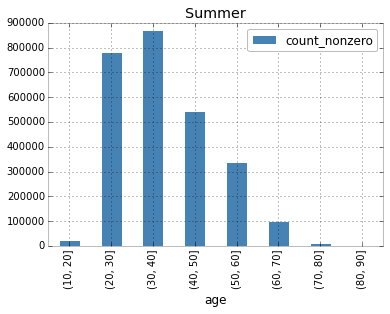

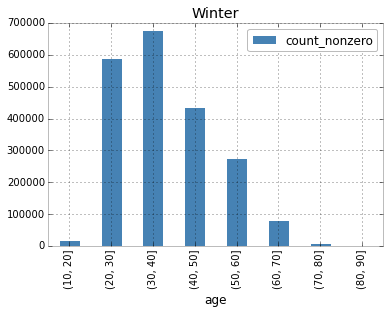

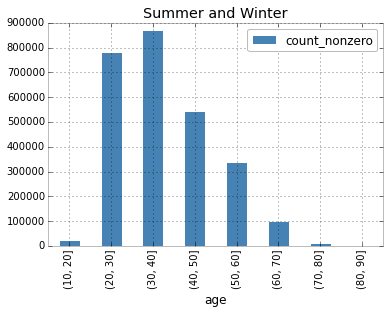

In [54]:
bins = np.arange(10, 99, 10)

df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])

df_total.age.groupby(pd.cut(df_total.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer and Winter")
total_age_dist = df_total.age.groupby(pd.cut(df_total.age, bins)).agg([count_nonzero])
    

#KS tests for goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

### KS tests for goodness of fit: Guassion Distribution

In [68]:
#compare to normal
ksS=scipy.stats.kstest(S_age_dist, 'norm')
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ks_total=scipy.stats.kstest(total_age_dist, 'norm')


print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "total, normal fit", ks_total

#compare to poisson 
ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
ks_total=scipy.stats.kstest(total_age_dist, 'cauchy')

print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "total, normal fit", ks_total

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
total, normal fit (1.0, 0.0)
winter, normal fit (0.99999953114568041, 0.0)
summer, normal fit (0.99999963442994877, 0.0)
total, normal fit (0.99999963442994877, 0.0)


From the KS test we know the critial value is 1 or 0.999. Base on P value, which equals zero, we will reject the null hypothesis that the tested distribution same as normal distribution. 

The scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

### KS tests for goodness of fit: Gamma Distribution

In [69]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))
ks_total=scipy.stats.kstest(total_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "total, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
total, normal fit (1.0, 0.0)


From the KS test we know the critial value is 1. Base on P value, which equals zero, we will reject the null hypothesis that the tested distribution same as gamma distribution. 

or I can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [72]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [74]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))
ks_total=scipy.stats.kstest(total_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "total, normal fit", ks_total

winter, normal fit (1066635675.0, nan)
summer, normal fit (831665975.0, nan)
total, normal fit (1066635675.0, nan)


The Kolmogorov-Smirnov test performs a test of the distribution G(x) of an observed random variable against a given distribution F(x), in the above case, we fit with gaussion distribution. Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.

In [75]:
# Then I use AD Test to re-test the distributions:
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')
print "Winter on normal", adW

adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')
print "Summer on normal", adS

ad_total=scipy.stats.anderson(total_age_dist['count_nonzero'], dist='norm')
print "total", ad_total

Winter on normal (0.49489267614496413, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Summer on normal (0.51294415781601543, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
total (0.51294415781601543, array([ 0.519,  0.591,  0.709,  0.827,  0.984]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### Differences in the sample:
We are also curious about if there is a difference in age distribution of summer and winter users. 

In [76]:
mean_s = np.mean(df_S.age)
mean_w = np.mean(df_W.age)
n_s = len(df_S.age)
n_w = len(df_W.age)
sd_s = np.std(df_S.age, axis=0)
sd_w = np.std(df_W.age, axis=0)
mudiff = 0

In [77]:
def twoSampZ(mean_s, mean_w, mudiff, sd_s, sd_w, n_s, n_w):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd_s**2/n_s + sd_w**2/n_w)
    z = ((mean_s - mean_w) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [78]:
z, p = twoSampZ(mean_s, mean_w, 0, sd_s, sd_w, n_s, n_w)
print (z, p)

(-29.456, 0.0)


Our p value is really small which eaquals zero. Therefore we can reject the null hypothesis and state that there is an age difference between summer time and winter users. 